In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,recall_score,precision_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv(r'C:\Users\pc\Downloads\loan-train (2).csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
dff=df.drop(['Gender','Married','Loan_ID'],axis=1)

In [8]:
dff.isnull().sum()

Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
dff['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [10]:
dff['Dependents'].replace('3+',3,inplace=True)

In [11]:
dff['Dependents']=dff['Dependents'].fillna(dff['Dependents'].median())
dff['Self_Employed']=dff['Self_Employed'].fillna(dff['Self_Employed'].mode()[0])
dff['LoanAmount']=dff['LoanAmount'].fillna(dff['LoanAmount'].median())
dff['Loan_Amount_Term']=dff['Loan_Amount_Term'].fillna(dff['Loan_Amount_Term'].median())
dff['Credit_History']=dff['Credit_History'].fillna(dff['Credit_History'].median())

In [12]:
dff.isnull().sum()

Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
encoder=LabelEncoder()
dff['Education']=encoder.fit_transform(dff['Education'])
dff['Self_Employed']=encoder.fit_transform(dff['Self_Employed'])
dff['Property_Area']=encoder.fit_transform(dff['Property_Area'])
dff['Loan_Status']=encoder.fit_transform(dff['Loan_Status'])

In [14]:
x=dff.drop('Loan_Status', axis=1)
y=dff['Loan_Status']

In [15]:
print(x)

    Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  \
0            0          0              0             5849                0.0   
1            1          0              0             4583             1508.0   
2            0          0              1             3000                0.0   
3            0          1              0             2583             2358.0   
4            0          0              0             6000                0.0   
..         ...        ...            ...              ...                ...   
609          0          0              0             2900                0.0   
610          3          0              0             4106                0.0   
611          1          0              0             8072              240.0   
612          2          0              0             7583                0.0   
613          0          0              1             4583                0.0   

     LoanAmount  Loan_Amount_Term  Cred

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
rf_classifier=RandomForestClassifier(n_estimators=10,random_state=0)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [18]:
y_pred=rf_classifier.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:{0:.2f}".format(accuracy))

Accuracy Score:0.76


In [20]:
f1=f1_score(y_test,y_pred)
print('F1_Score: {0:.2f}'.format(f1))

F1_Score: 0.83


In [21]:
r_score=recall_score(y_test,y_pred)
print('Recall Score:{0:.2f}'.format(r_score))

Recall Score:0.83


In [22]:
pr_score=precision_score(y_test,y_pred)
print('Precision Score:{0:.2f}'.format(pr_score))

Precision Score:0.83


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        33
           1       0.83      0.83      0.83        90

    accuracy                           0.76       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.76      0.76      0.76       123



In [24]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[18 15]
 [15 75]]


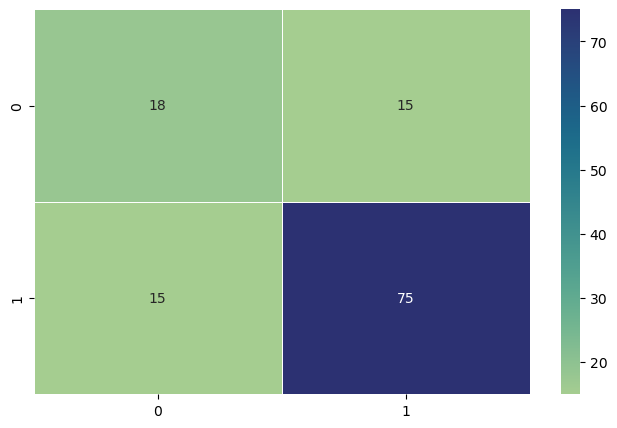

In [25]:
plt.subplots(figsize=(8,5))
sns.heatmap(cm,annot=True,linewidth=0.5,fmt='d',cmap="crest")
plt.show()